<a href="https://colab.research.google.com/github/Venura-Shiromal/Ai-session-term1/blob/main/Linear_Curve_Fitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import PolynomialFeatures

In [17]:
data=pd.read_csv('Assignment_ForFun.csv')
print(data)

    Input X  Output Y
0         0         5
1         1        12
2         2        25
3         3        44
4         4        69
5         5       100
6         6       137
7         7       180
8         8       229
9         9       284
10       10       345
11       11       412
12       12       485
13       13       564
14       14       649
15       15       740
16       16       837
17       17       940
18       18      1049
19       19      1164
20       20      1285


In [18]:
x=data['Input X'].values.reshape(-1,1)
print(x)

[[ 0]
 [ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]
 [12]
 [13]
 [14]
 [15]
 [16]
 [17]
 [18]
 [19]
 [20]]


In [19]:
y=data['Output Y'].values
print(y)

[   5   12   25   44   69  100  137  180  229  284  345  412  485  564
  649  740  837  940 1049 1164 1285]


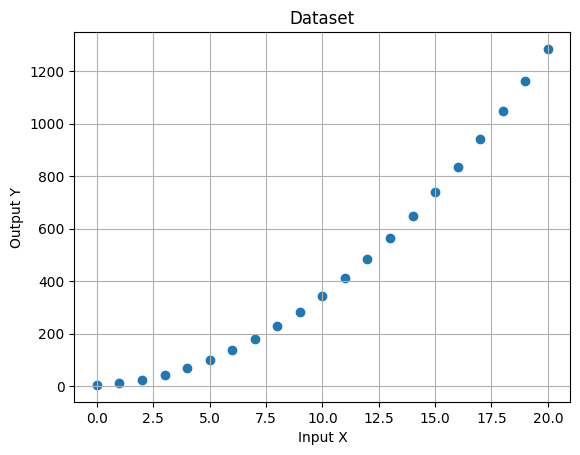

In [20]:
plt.scatter(x,y)
plt.xlabel('Input X')
plt.ylabel('Output Y')
plt.title('Dataset')
plt.grid(True)
plt.show()

In [21]:
poly = PolynomialFeatures(degree=2, include_bias=False)
x_quad = poly.fit_transform(x)

In [22]:
max_iter=1000
learning_rate=0.01

In [23]:
nn_model=MLPRegressor(hidden_layer_sizes=(1,),max_iter=max_iter,learning_rate_init=learning_rate)

In [24]:
nn_model.fit(x_quad,y)

MLPRegressor(hidden_layer_sizes=(1,), learning_rate_init=0.01, max_iter=1000)

In [26]:
loss_values=[]
for i in range(max_iter):
  nn_model.partial_fit(x_quad,y)
  y_pred_partial = nn_model.predict(x_quad)
  loss=np.mean((y-y_pred_partial)**2)
  loss_values.append(loss)

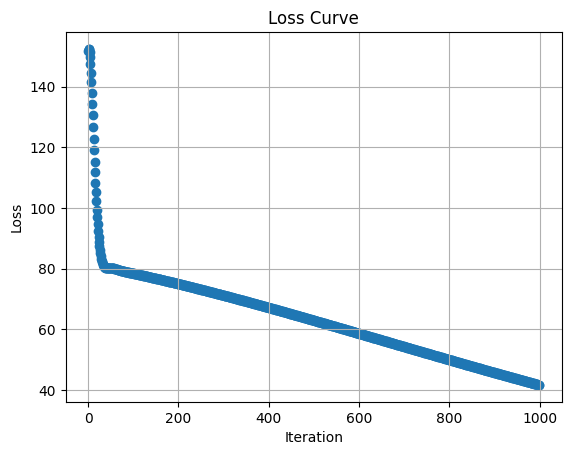

In [27]:
plt.scatter(range(max_iter),loss_values)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.grid(True)
plt.show()

In [28]:
weight_1=nn_model.coefs_[0]
print('Weight_1:',weight_1)

weight_2=nn_model.coefs_[1]
print('Weight_2:',weight_2)

bias_1=nn_model.intercepts_[0]
print('Bias_1:',bias_1)

bias_2=nn_model.intercepts_[1]
print('Bias_2:',bias_2)

Weight_1: [[0.79621007]
 [1.83948602]]
Weight_2: [[1.71370273]]
Bias_1: [3.27369266]
Bias_2: [1.65570428]


In [29]:
m=weight_1*weight_2
c=bias_1*weight_2+bias_2
print('m:',m)
print('c:',c)

m: [[1.36446738]
 [3.15233223]]
c: [[7.26584035]]


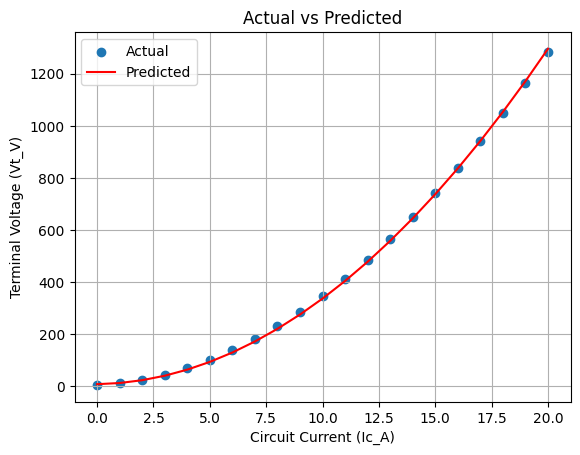

In [30]:
plt.scatter(x,y,label='Actual')
plt.plot(x,y_pred_partial, color='red', label='Predicted')
plt.xlabel('Circuit Current (Ic_A)')
plt.ylabel('Terminal Voltage (Vt_V)')
plt.title('Actual vs Predicted')
plt.legend()
plt.grid(True)
plt.show()